In [16]:
import nltk

nltk.download('punkt')
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import re
from gensim.models import word2vec
from nltk.tokenize import sent_tokenize
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA





[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sonerkuyar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
#TODO 
#IMPLEMENT EFFICENT WAY TO PROCESS LARGE CORPUS FILES
'''
chunk_size = 1000000  # read 1MB at a time
offset = 0
sentences = []
with open("alperen.txt", "r") as f:
    while True:
        f.seek(offset)
        try:
            chunk = f.read(chunk_size)
            chunk = chunk.lower()
    
            # Remove any non-alphanumeric characters
            chunk = re.sub(r'[^a-z0-9 ]', '', chunk)
            if not chunk:
                break
            offset += len(chunk)
            sentences.extend(nltk.sent_tokenize(chunk))
        except:
            pass
'''

In [6]:
def preprocess(corpus_file):
    with open(corpus_file, 'r') as file:
        # Read the entire corpus into memory
        text = file.read()
    
    # Lowercase the text
    text = text.lower()
    
    # Remove any non-alphanumeric characters
    text = re.sub(r'[^a-z0-9 ]', '', text)
    
    # Split the text into sentences using the sent_tokenize function
    sentences = sent_tokenize(text)
    
    # Tokenize each sentence into words
    sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
    
    return sentences

In [27]:
sentences = preprocess("small_file_1000000.txt")

In [28]:
import gensim

def train_word2vec(sentences, vector_size=100, window=5, min_count=5, workers=4):
    # Train the word2vec model on the sentences
    model = gensim.models.Word2Vec(sentences, vector_size=vector_size, window=window, min_count=min_count, workers=workers)
    
    return model


In [29]:

model =train_word2vec(sentences)

In [47]:
def visualize_word_embeddings(model, num_words=100):
    # get word_vectors from the model
    word_vectors = model.wv
    words = word_vectors.index_to_key

    # get word frequency from the model and sort them 
    word_frequency = {word: model.wv.get_vecattr(word, "count") for word in words}
    sorted_words = sorted(word_frequency.items(), key=lambda x: x[1], reverse=True)

    # get most frequent num_words
    words = [word for word, _ in sorted_words[:num_words]]
    word_vectors = word_vectors[words]
    
    # pca dimensionality reduction
    pca = PCA(n_components=2)
    word_vectors_2d = pca.fit_transform(word_vectors)
    
    # Plot the words on a scatter plot
    plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1])
    
    # plotting
    for i, word in enumerate(words):
        plt.annotate(word, (word_vectors_2d[i, 0], word_vectors_2d[i, 1]))
    
   
    plt.show()


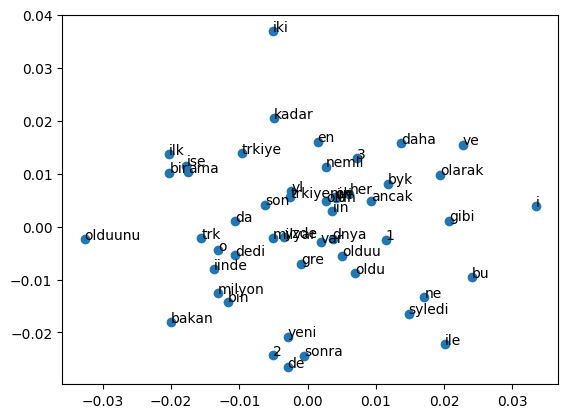

In [49]:
visualize_word_embeddings(model)